# Part One: Network Models 

## 1. Watts-strogatz Networks

- Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#Creates an empty list p, which is going to contain the different graphs
p = []

#Sets the values of p in a list.
pval = [0, 0.1, 1]

#runs through all values of p, creating one graph for each and prints the average shortest path length for that give graph.
for x in range (0,len(pval)):
    p.insert(len(p),nx.watts_strogatz_graph(500, 4, pval[x]))
    print('Average shortest path length  for p=' + str(pval[x]) + ' is: ' + str(nx.average_shortest_path_length(p[x])))



Average shortest path length  for p=0 is: 62.875751503
Average shortest path length  for p=0.1 is: 7.95524649299
Average shortest path length  for p=1 is: 4.74550701403


In the above data it can be seen that the average shortest path length decreases, as the probability increases. 
This makes sense since a higher probability will provide more links in the graph and therefore make paths shorter.

- Let's understand the behavior of the WS model as we increase p in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

In [4]:
#Create a list with all p values
pval = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

#Creates empty lists which are going to contain the standard deviation, sum of average shortest path length for each p
pstd = []
psum = []

#p is being used as a place holder for the average shortest path length of the 50 graphs for each value of p.
p = []

# this loop runs through all values in pval
for y in range (0, len(pval)):
    #This loop calculates the average shortest path length for 50 graphs, using the given p value
    for x in range (0,50):
        p.insert(len(p), nx.average_shortest_path_length(nx.watts_strogatz_graph(500, 4, pval[y])))
    #After 50 average short path lengths has been calculated, the standard deviation and the sum of these lengths are calculated.
    #p is reset in order to have an empty list for the 50 graphs of the next p value.
    pstd.insert(len(pstd), np.std(p))
    psum.insert(len(p), sum(p)/50)
    p = []

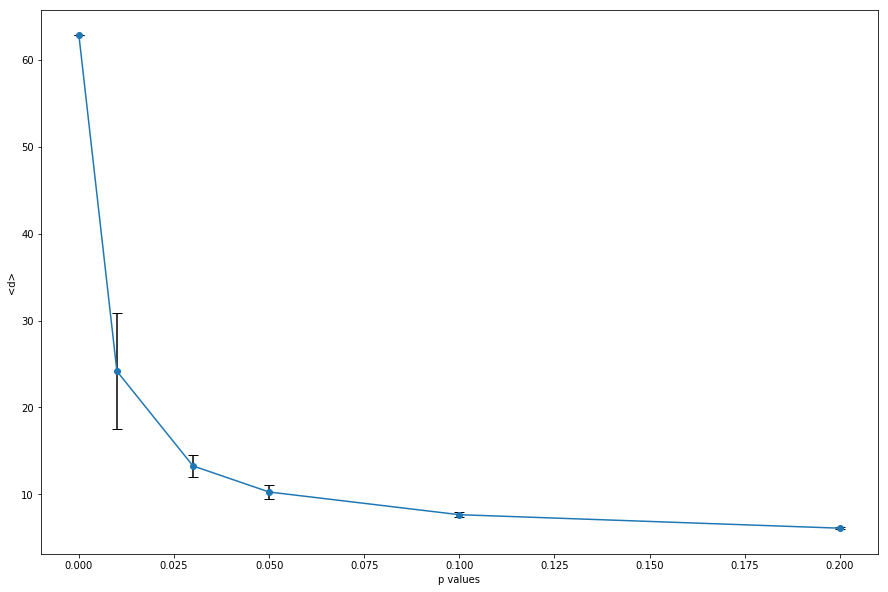

In [5]:
#This part sets the figure size of the plot and plots the average shortest path length for each of the p values.
fig = plt.figure(figsize = (15,10))
plt.errorbar(pval,psum,pstd,capsize = 5, fmt = 'o-', ecolor = 'black')
plt.xlabel('p values')
plt.ylabel('<d>')
plt.show()

In the above graph it can be seen that if the probability = 0 then there are no standard deviation. This is because there are no links, there is therefor no deviation.

The amount of links a graph has varies depending on the probability. A low probability therefore results in a small amount of links.
When multiple runs are done with the same probability, the graphs will have a different amount of links. By having a low amount of links the difference between the graphs becomes greater, percentage vise, than it would with a large amount of links.

This can also be conducted based on the above graph by having the standard deviation become smaller, when the probability becomes higher.


## 2. The Barabasi-Albert Model

In [1]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import random
import networkx as nx
from __future__ import division

### Create our own Barabasi-Albert mode

> *Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.*

<function matplotlib.pyplot.show>

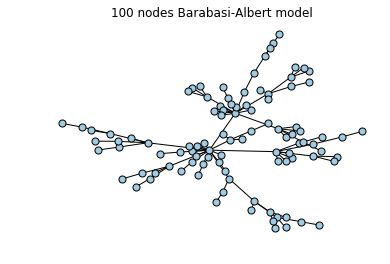

In [2]:
# Keep track of the number of nodes added
nodesAdded = 0

#Set up the Graph
BA = nx.Graph()
BA.add_nodes_from([0,1])  #First Nodes
nodesAdded = 2            #Update the number of nodes added
BA.add_edge(0,1)          #Add th first edge

#Create a connection list
connection = [0,1]

#Go up to 100 nodes network
while nodesAdded<100:
    BA.add_node(nodesAdded)            #Add one more node
    no = random.choice(connection)     #Choose a node to build a connection with 
    #(in the connection list the number of occurences of a node is proportionnal with its degree)
    BA.add_edge(nodesAdded,no)         #Add the corresponding connection
    connection.append(nodesAdded)      #Update connection seq
    connection.append(no)              #Update connection seq
    nodesAdded = nodesAdded +1         #Update nb of nodes

#Draw the network built
nx.draw_networkx(BA,node_size= 50, with_labels = False, node_color = "#A0CBE2", edgecolors = "#000000")
plt.axis('off')
plt.title("100 nodes Barabasi-Albert model")
plt.show()

> *Now create a 5000 node network.*
- *What's the maximum and minimum degree? *
- *Now, bin the degree distribution, for example using numpy.histogram.*
- *Plot the distribution. Plot it with both linear and log-log axes.*

In [3]:
#Go up to 5000 nodes network
while nodesAdded<5000:
    BA.add_node(nodesAdded)            #Add one more node
    no = random.choice(connection)     #Choose a node to build a connection with 
    #(in the connection list the number of occurences of a node is proportionnal with its degre)
    BA.add_edge(nodesAdded,no)         #Add the corresponding connection
    connection.append(nodesAdded)      #Update connection seq
    connection.append(no)              #Update connection seq
    nodesAdded = nodesAdded +1         #Update nb of nodes

Minimum degree = 1
Maximum degree = 126


Text(0,0.5,'Log(Number of occurences)')

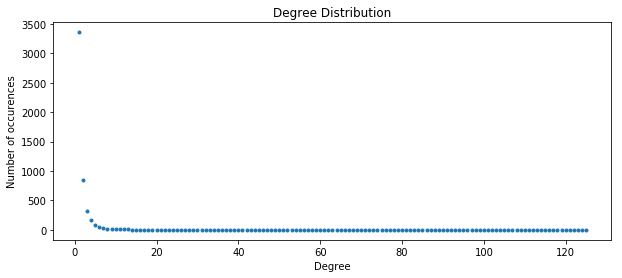

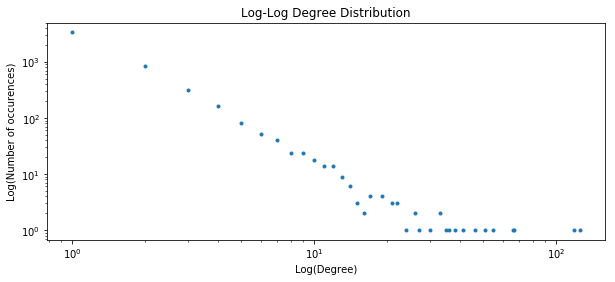

In [4]:
# Get the degree of the graph nodes
degrees = [BA.degree(i) for i in range(nodesAdded)]
    
# Get the minimum and maximum degree
min_bin = np.amin(degrees)
max_bin = np.amax(degrees)
print("Minimum degree = "+str(min_bin))
print("Maximum degree = "+str(max_bin))


# Set up the bins for the degree distribution
nb_bins = int(max_bin)-int(min_bin)              #the number of bins corresponds to the difference 
                                                 #between the maximum and the minimum degree
v = [min_bin+i for i in range(nb_bins+1)]        #store the bins limits
  
#Hist
hist, bin_edges = np.histogram(degrees,bins = v) #use the histogram function to group by the degree

#Plot the Charts

# Normal plot        
plt.figure(figsize = (10,4))
plt.title("Degree Distribution")
plt.plot(v[0:nb_bins], hist, '.')
plt.xlabel('Degree')
plt.ylabel('Number of occurences')

# Log-Log Plot
plt.figure(figsize = (10,4))
plt.title("Log-Log Degree Distribution")
plt.loglog(v[0:nb_bins], hist, '.')
plt.xlabel('Log(Degree)')
plt.ylabel('Log(Number of occurences)')

## 3. Power-laws and the friendship paradox

>*Next step is to explore the Friendship paradox. This paradox states that almost everyone have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:*
* *Pick a node i at random (e.g. use random.choice). Find its degree.*
* *Find i's neighbors. And calculate their average degree.*
* *Compare the two numbers to check if it's true that i's friends (on average) have more friends than i.*
* *Do this 1000 times. How many out of those 1000 times is the friendship paradox true?*

***Pick a node i at random (e.g. use random.choice). Find its degree.***

In [5]:
# Pick a random node
i = np.random.choice(BA.nodes,size = 1)[0]
# Store its degree
degree = BA.degree(i)

print "The degree of node "+str(i)+" (randomly chosen) is "+str(degree)

The degree of node 2812 (randomly chosen) is 1


***Find i's neighbors. And calculate their average degree.***

In [6]:
#Get the neighbors                        
neighbors =[n for n in BA[i]]                         # in networkX 2.2 G[i] gives the neighbors of node i in network G

#Get the average degree of i node neighbors
avDeg = 0.0                                           # create a variable to store the neighbors average degree
for j in range(len(neighbors)):                       # go through the neighbors
    avDeg += BA.degree(neighbors[j])/len(neighbors)   # add the degre of each neighbors divided by the number of neighbors 

print("Average Neighbors Degree = "+str(avDeg))

#Check if the Friendship Paradox is verified
if (degree > avDeg):
    print("The Friendship Paradox is not verified")
else :
    print("The Friendship Paradox is verified")

Average Neighbors Degree = 8.0
The Friendship Paradox is verified


***Do this 1000 times. How many out of those 1000 times is the friendship paradox true?***

In [7]:
# Let's define a function to verify friendship paradox in one case
def verifyFriendshipParadox(A):
    i = np.random.choice(A.nodes,size = 1)[0]             # Pick a random node
    degree = A.degree(i)                                  # Store its degree
    
    neighbors =[n for n in A[i]]                          # Find its neighbors
    
    avDeg = 0                                             # create a variable to store the neighbors average degree
    for j in range(len(neighbors)):                       # go through the neighbors 
        avDeg += BA.degree(neighbors[j])/len(neighbors)   # add the degre of each neighbors divided by the number of neighbors
        #(In this Barabasi-Albert network, constructed like we have done, every node has at least 1 link)

    if (degree > avDeg):
        return 0                                          # if the paradox is not verified return 0
    else :
        return 1                                          # if the paradox is verified return 1

In [8]:
# Let's run this function a 1000 times
verified = 0                                   #store the number of times the paradox has been verified
for a in range(1000):                          #do it a 1000 times
    verified += verifyFriendshipParadox(BA)    #add 1 if the paradox is verified 0 otherwise

print "Over a 1000 times, the Friendship Paradox has been verified "+str(verified)+" times."

Over a 1000 times, the Friendship Paradox has been verified 893 times.


# Part Two: The network of American politics
This exercise assumes that you have already downloaded wiki-pages and created the directed network of members of congress from Wikipedia (see Week 4's exercises).

## 4. Basic stats for pages over time
Put together descriptive statistics for the US house of representatives over time (e.g. for the 113, 114 and 115th, congress).

- By the word member we mean a politician who has been elected to the house of representatives. Plot the number of members of the house of Representatives over time. You chose if you want to use a line-chart or a bar-chart. Is this development over time what you would expect? Why? Explain in your own words.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Load data
H113 = pd.read_csv("../socialgraphs2018/files/data_US_congress/H113.csv")
H113["congressnumber"] = 113
H114 =pd.read_csv("../socialgraphs2018/files/data_US_congress/H114.csv")
H114["congressnumber"] = 114
H115 = pd.read_csv("../socialgraphs2018/files/data_US_congress/H115.csv")
H115["congressnumber"] = 115

In [38]:
#Preprocessing data
allmembers = pd.concat([H113,H114,H115]).reset_index(drop=True)
elected=allmembers.groupby("congressnumber")
electedsize=elected.size()
print electedsize

congressnumber
113    444
114    442
115    445
dtype: int64


We clearly see that the number of representatives is higher than 435! This is due to replacements during the period. A line plot can be seen below

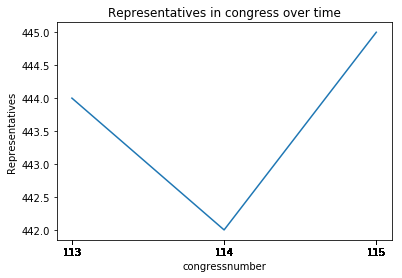

In [78]:
#Plotting
plt.title("Representatives in congress over time")
plt.ylabel("Representatives")
electedsize.plot(xticks=allmembers["congressnumber"])
plt.show()

- How many members appear in all the three congresses? How many in two? How many in one? Plot your results using a histogram.

1    131
2    114
3    324
dtype: int64


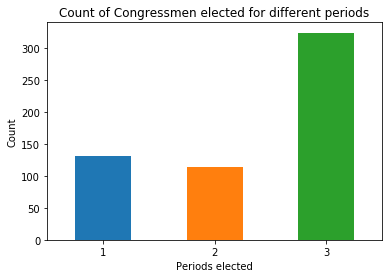

In [73]:
#Group by name and group by self
groups = allmembers.groupby("WikiPageName")
time_in_groups = groups.size().sort_values()
result = time_in_groups.groupby(time_in_groups).size()
print result
#Plotting
plt.tight_layout()
plt.title("Count of Congressmen elected for different periods")
plt.ylabel("Count")
plt.xlabel("Periods elected")
result.plot.bar(rot=0)
plt.show()

We see that the majority of representatives are elected for multiple terms! 

- Which states are more represented in the house of representatives? Which are less? Plot a histogram showing the number of members per state.

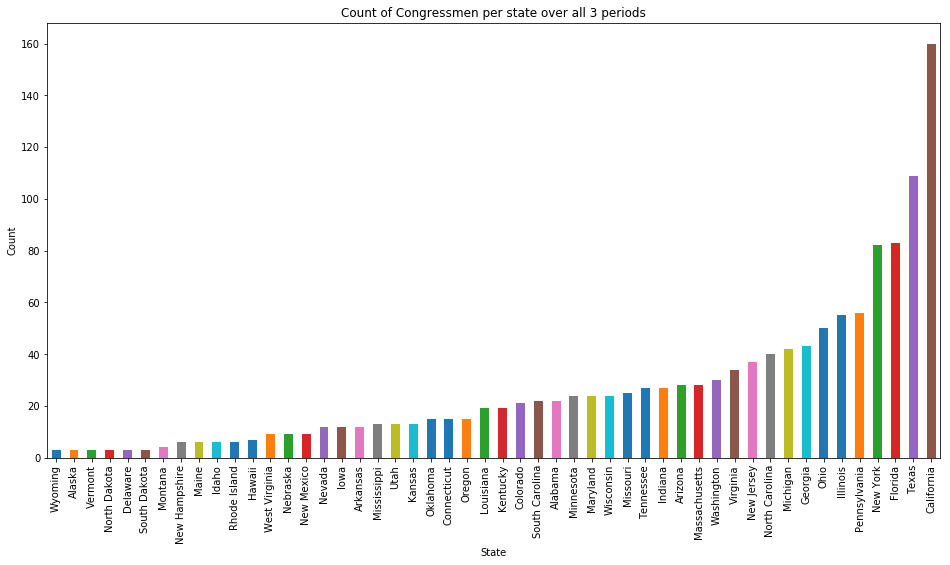

In [77]:
#Group by state
state = allmembers.groupby("State")
statesize=state.size().sort_values()
#Plotting
fig = plt.figure(figsize=(16, 8))
plt.title("Count of Congressmen per state over all 3 periods")
plt.ylabel("Count")
plt.xlabel("State")
statesize.plot("bar")
plt.show()

California and Texas are definitely the most represented states. Wyoming and Alaska are the least. This makes sense due to their population size.

- How has the party composition of the house of representative changed over time? Plot your results.

congressnumber  Party     
113             Democratic    204
                Republican    240
114             Democratic    190
                Republican    252
115             Democratic    196
                Republican    249
dtype: int64


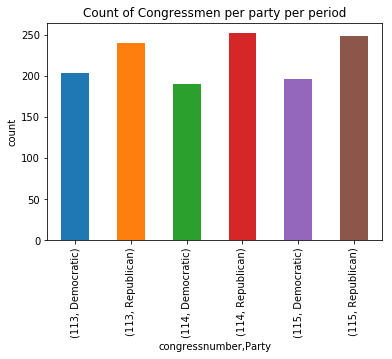

In [72]:
parties = allmembers.groupby(["congressnumber","Party"]).size()
print parties
plt.title("Count of Congressmen per party per period")
plt.ylabel("count")
parties.plot("bar",label="Democratic")
plt.show()

The house of Representatives is dominated by Republicans. The 113th Congress had the largest Democratic proportion but the following term had the largest Republican proportion (under Obama and Trumps election). 

## 5. Basic stats for the network
Create simple network statistics for the 113th house of representatives.

- What is the number of nodes in the network? And the number of links?

In [46]:
import networkx as nx
import re

In [51]:
#Making a Directed graph
G = nx.DiGraph()
#Unique list for matching
members = H113["WikiPageName"].unique()
for idx,member in enumerate(members):
    members[idx] = member.replace("_", " ")
#Adding nodes to graph
G.add_nodes_from(members)
for member in members:
    string = member.replace(" ", "_")
    with open("H113/"+string) as f:
        string = str(f.readlines())
    match = re.findall(r'\[\[(.+?)]]', string)
    #Set intersection is the fastest way to match between elements
    matchlink = list(set(match).intersection(members))
    #Adding edges to graph
    linklist = [(member,link) for link in matchlink]
    G.add_edges_from(linklist)
print "Number of edges: " + str(G.number_of_edges())
print "Number of nodes: " + str(G.number_of_nodes())

Number of edges: 1393
Number of nodes: 444


In [52]:
# Make to dict for easy life
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

- Plot the in and out-degree distributions.

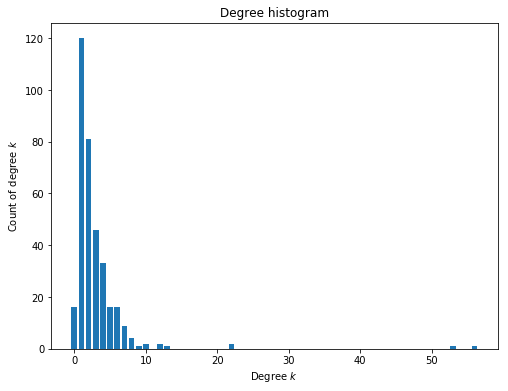

In [82]:
#Plotting the in-degree distribution
itera = list(range(min(in_degree.values()),max(in_degree.values())+1))
newitera = [x+1 for x in itera]
hist = np.histogram(in_degree.values(),bins=newitera)
fig = plt.figure(figsize=(8,6))
plt.title("Degree histogram")
plt.ylabel("Count of degree $k$")
plt.xlabel("Degree $k$")
plt.bar(list(range(min(in_degree.values()),max(in_degree.values()))),hist[0],align='center')
plt.show()

Clearly a power-log distribution!

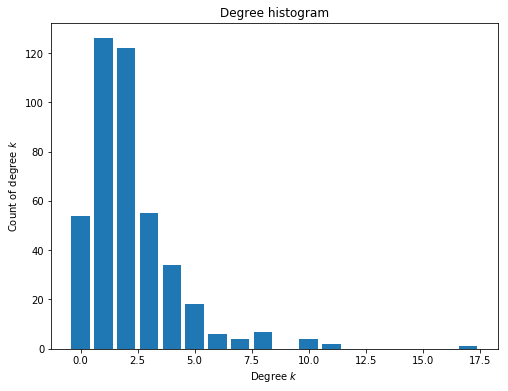

In [83]:
#Plotting the out-degree distribution
itera = list(range(min(out_degree.values()),max(out_degree.values())+1))
newitera = [x+1 for x in itera]
hist = np.histogram(out_degree.values(),bins=newitera)
fig = plt.figure(figsize=(8,6))
plt.title("Degree histogram")
plt.ylabel("Count of degree $k$")
plt.xlabel("Degree $k$")
plt.bar(list(range(min(out_degree.values()),max(out_degree.values()))),hist[0],align='center')
plt.show()

Clearly a power-log distribution!

- Who is the most connected representative?

In [64]:
#Get the most connected representative
listin = sorted(list(G.in_degree()),key=lambda x: x[1])
listout = sorted(list(G.out_degree()),key=lambda x: x[1])
listtotal = sorted(list(G.degree()),key=lambda x: x[1])
print "The representative with most links to their wikipage is %s with %d links" %listin[-1]
print "The representative with most links from their wikipage is %s with %d links" %listout[-1]
print "The representative with the highest sum of their links from and to their wikipage is %s with %d links" %listtotal[-1]

The representative with most links to their wikipage is Nancy Pelosi with 57 links
The representative with most links from their wikipage is Michele Bachmann with 18 links
The representative with the highest sum of their links from and to their wikipage is Nancy Pelosi with 66 links
